In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy import stats

In [4]:
data=pd.read_csv("marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
data.isnull().sum()/len(data)*100

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [7]:
X=data.drop("Total Claim Amount",axis=1)
y=data["Total Claim Amount"]

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64


In [12]:
X_num=X.select_dtypes(include=['float64', 'int64'])
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

<AxesSubplot:ylabel='Density'>

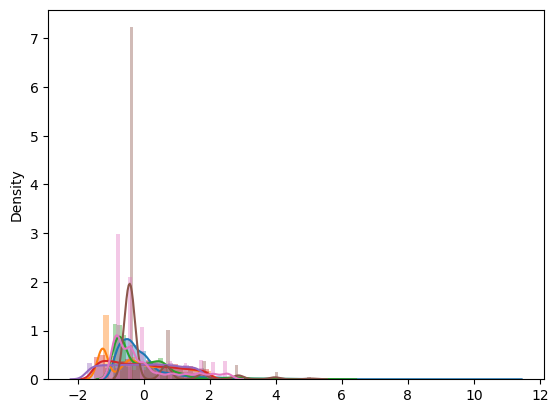

In [17]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X_num)
x_normalized=transformer.transform(X_num)

transformer=StandardScaler().fit(X_num)
x_standardized=transformer.transform(X_num)

sns.distplot(x_standardized.T[0])
sns.distplot(x_standardized.T[1])
sns.distplot(x_standardized.T[2])
sns.distplot(x_standardized.T[3])
sns.distplot(x_standardized.T[4])
sns.distplot(x_standardized.T[5])
sns.distplot(x_standardized.T[6])



<AxesSubplot:ylabel='Density'>

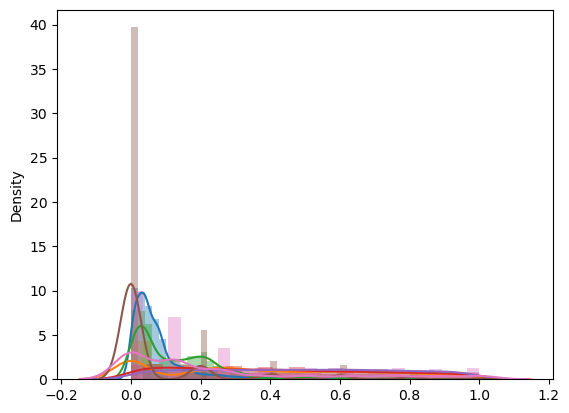

In [20]:
transformer=MinMaxScaler().fit(X_num)
x_minmax=transformer.transform(X_num)

sns.distplot(x_minmax.T[0])
sns.distplot(x_minmax.T[1])
sns.distplot(x_minmax.T[2])
sns.distplot(x_minmax.T[3])
sns.distplot(x_minmax.T[4])
sns.distplot(x_minmax.T[5])
sns.distplot(x_minmax.T[6])




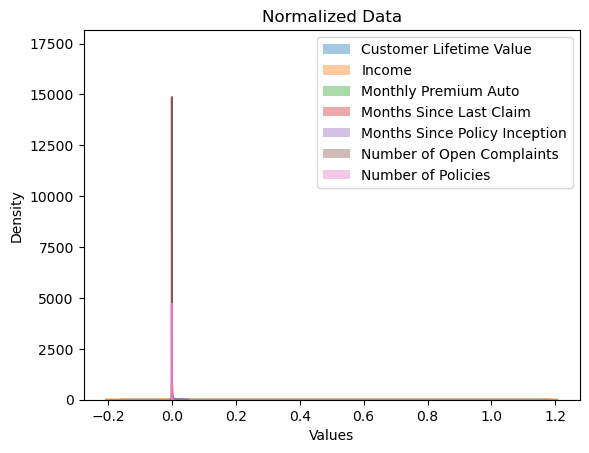

In [21]:

sns.distplot(x_normalized.T[0], label =X_num.columns[0])
sns.distplot(x_normalized.T[1], label =X_num.columns[1])
sns.distplot(x_normalized.T[2], label =X_num.columns[2])
sns.distplot(x_normalized.T[3], label =X_num.columns[3])
sns.distplot(x_normalized.T[4], label =X_num.columns[4])
sns.distplot(x_normalized.T[5], label =X_num.columns[5])
sns.distplot(x_normalized.T[6], label =X_num.columns[6])

plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Normalized Data")
plt.legend()
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

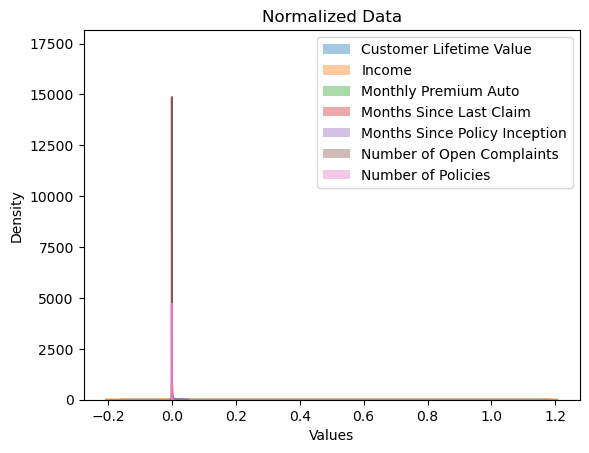

In [29]:

sns.distplot(x_normalized.T[0], label =X_num.columns[0])
sns.distplot(x_normalized.T[1], label =X_num.columns[1])
sns.distplot(x_normalized.T[2], label =X_num.columns[2])
sns.distplot(x_normalized.T[3], label =X_num.columns[3])
sns.distplot(x_normalized.T[4], label =X_num.columns[4])
sns.distplot(x_normalized.T[5], label =X_num.columns[5])
sns.distplot(x_normalized.T[6], label =X_num.columns[6])

plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Normalized Data")
plt.legend()
plt.show()